<a href="https://colab.research.google.com/github/StacyChebet/Compiler-Construction-Running-File/blob/master/Compiler_Construction_Running_File.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Group Members**
103722, 120690, 122289, 121787 ,115059

### **Lab Activity 1: Flex, Bison, Lex, Yacc**


### **Flex(Fast Lexical Analyzer Generator):**

It is a computer program that is used for generating lexical analyzers which are used to perform pattern-matching in text. Flex automates the conversion of RE to NFA and NFA to DFA.

It happens to be more flexible than Lex and Yacc and it produces faster code.

Flex is made up of 3 sections: the definition section which contains the declaration of variables, regular definitions and manifest constants, the rules section which contains the pattern and the corresponding action and the user defined section which typically contains any valid C code.


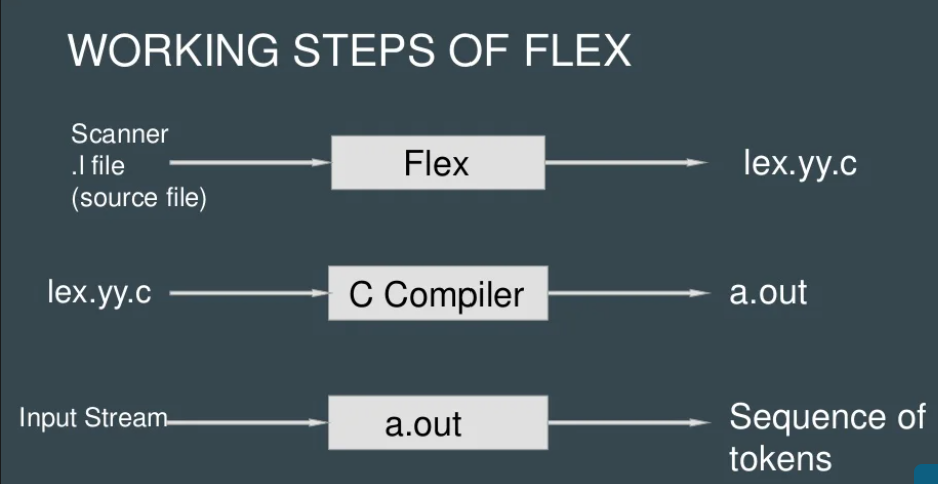

In [ ]:
# Code snippet
# Counts the number of characters and number of lines in the input
/*** Definition Section  ***/

%{
int count_lines = 0, count_chars = 0;
%}

/*** Rule Section ***/
# Rule 1:Matches any character exluding a new line.
# Rule 2: Matches a new line. 

%%
.	 ++count_chars;
\n ++count_lines; ++count_chars;

%%

/*** Code Section ***/
main()
  {
  yylex();
  printf("Number of lines = %d, Number of chars = %d\n",
         count_lines, count_chars);
  }

### **Bison**
Bison is a parser generator.

It is to parsers what flex is to scanners. You provide the input of a grammar specification and it generates an LALR(1) parser to recognize sentences in that grammar. 

Bison is an upgraded version of the older tool yacc, "yet another compiler compiler" and it is probably the most common of the LALR tools out there. 

Bison is designed for use with C code and generates a parser written in C.

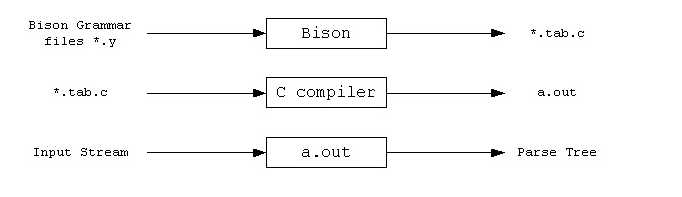

In [ ]:
%code
{
  namespace yy
  {
    // Return the next token.
    auto yylex () -> parser::symbol_type
    {
      static int count = 0;
      switch (int stage = count++)
        {
        case 0:
          return parser::make_TEXT ("I have three numbers for you.");
        case 1: case 2: case 3:
          return parser::make_NUMBER (stage);
        case 4:
          return parser::make_TEXT ("And that's all!");
        default:
          return parser::make_YYEOF ();
        }
    }
  }
}


%%
namespace yy
{
  // Report an error to the user.
  auto parser::error (const std::string& msg) -> void
  {
    std::cerr << msg << '\n';
  }
}

int main ()
{
  yy::parser parse;
  return parse ();
}

  ### **Lex**

  Lex is a program designed to generate scanners which recognize lexical patterns in text. These scanners can also be referred to as tokenizers.
  Lex was originally developed by Eric Schmidt and Mike Lesk. 

  Lex faciliates the processing of character sequences such as source code to produce symbol sequences referred to as tokens for use as input to other programs such as parsers.

  Below is a lex file that recognizes strings of numbers in the provided input and prints them out.

In [ ]:
#include <stdio.h>

%%
   
[0-9]+  {
            printf("This is an integer: %s\n", yytext);
        }

.|\n  {  }

%%

int main(void)
{
    yylex();
    return 0;
}

**NB:** The symbol **%%** marks the beginning of the rules.

#####**Yacc**
#####Yacc (Yet Another Compiler Compiler) is a tool for constructing parsers. Yacc generates C code for a syntax analyzer.
#####Yacc uses grammar rules that allow it to analyze tokens from lex and create a syntax tree.
#####A syntax tree imposes a hierarchical structure on tokens. For example, operator precedence and associativity are apparent in a syntax tree. 
#####The next step, code generation, does a depth-first walk of the syntax tree to generate code, of which some compilers generate machine code while others produce assembly code.
<figure>
  <img src="https://images.slideplayer.com/26/8745488/slides/slide_4.jpg">
  <figcaption align="center">Fig.4 - How Yacc works</figcaption>
</figure>

#####**Yacc Code Snippet**
#####**Problem:** Yacc program to implement a calculator and recognize a valid arithmetic expression.


#####**Lexical Analyzer Source Code:**

In [ ]:
%{
   /* Definition section */
  #include<stdio.h>
  #include "y.tab.h"
  extern int yylval;
%}
  
/* Rule Section */
%%
[0-9]+ {
          yylval=atoi(yytext);
          return NUMBER;
  
       }
[\t] ;
  
[\n] return 0;
  
. return yytext[0];
  
%%
  
int yywrap()
{
 return 1;
}

#####**Parser Source Code:**

In [ ]:
%{
   /* Definition section */
  #include<stdio.h>
  int flag=0;
%}
  
%token NUMBER
  
%left '+' '-'
  
%left '*' '/' '%'
  
%left '(' ')'
  
/* Rule Section */
%%
  
ArithmeticExpression: E{
  
         printf("\nResult=%d\n", $$);
  
         return 0;
  
        };
 E:E'+'E {$$=$1+$3;}
  
 |E'-'E {$$=$1-$3;}
  
 |E'*'E {$$=$1*$3;}
  
 |E'/'E {$$=$1/$3;}
  
 |E'%'E {$$=$1%$3;}
  
 |'('E')' {$$=$2;}
  
 | NUMBER {$$=$1;}
  
 ;
  
%%

#####**Driver Code:**

In [ ]:
void main()
{
   printf("\nEnter Any Arithmetic Expression which 
                   can have operations Addition, 
                   Subtraction, Multiplication, Division, 
                          Modulus and Round brackets:\n");

   yyparse();
   if(flag==0)
   printf("\nEntered arithmetic expression is Valid\n\n");
}

void yyerror()
{
   printf("\nEntered arithmetic expression is Invalid\n\n");
   flag=1;
}

### **References:**

https://arcb.csc.ncsu.edu/~mueller/codeopt/codeopt00/y_man.pdf
http://www.cs.bilkent.edu.tr/~guvenir/courses/CS315/lex-yacc/lex-yacc.pdf
https://www.geeksforgeeks.org/yacc-program-to-implement-a-calculator-and-recognize-a-valid-arithmetic-expression/

Bison—Examples. (n.d.). Retrieved September 8, 2022, from http://web.mit.edu/gnu/doc/html/bison_5.html
Gao. (n.d.). Bison Tutorial. Retrieved September 8, 2022, from http://alumni.cs.ucr.edu/~lgao/teaching/bison.html
Johnson, M. (2012, July 9). Introduction to Bison. https://web.stanford.edu/class/archive/cs/cs143/cs143.1128/handouts/120%20Introducing%20bison.pdf

https://www.geeksforgeeks.org/flex-fast-lexical-analyzer-generator/

https://www.slideshare.net/SandipBasnet3/flex-fast-lexical-analyzer-generator

Levine, J. R., & Levine, J. R. (2009). Flex & bison (1st ed). O’Reilly.

Levine, J. R., Mason, T., & Brown, D. (1997). Lex & yacc (2. ed., minor corr). O’Reilly.
